<a href="https://colab.research.google.com/github/sathishk951/Predicting-People-s-Movement/blob/main/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER/Nairobi Transport Data.zip')

In [83]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [13]:
df.max_capacity.value_counts()

49    31985
11    19660
Name: max_capacity, dtype: int64

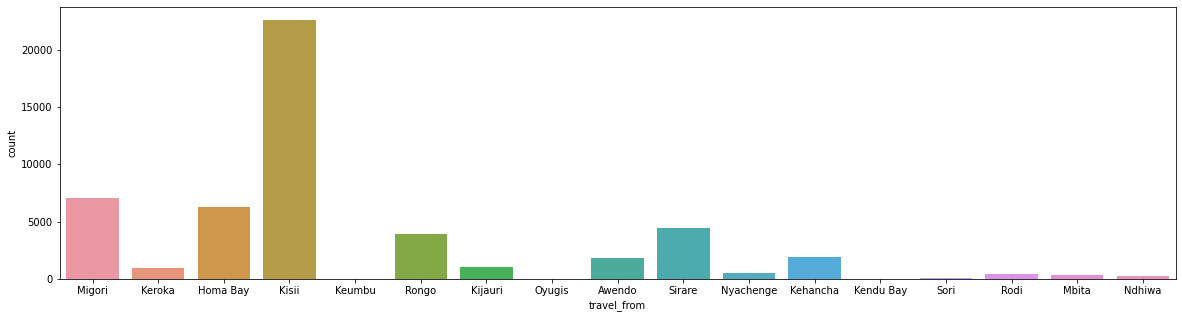

In [17]:
f, ax = plt.subplots(figsize = (20, 5))
sns.countplot(data = df, x = "travel_from") 
plt.show()

In [18]:
df.travel_from.value_counts()

Kisii        22607
Migori        7027
Homa Bay      6304
Sirare        4449
Rongo         3928
Kehancha      1909
Awendo        1788
Kijauri       1031
Keroka         988
Nyachenge      512
Rodi           405
Mbita          378
Ndhiwa         236
Sori            55
Keumbu          22
Oyugis           5
Kendu Bay        1
Name: travel_from, dtype: int64

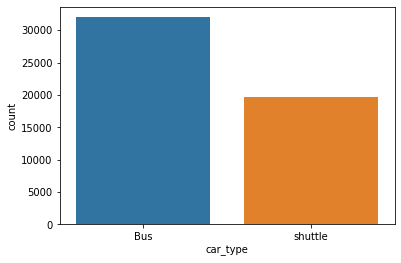

In [19]:
sns.countplot(x='car_type',data=df)

In [20]:
df.car_type.value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

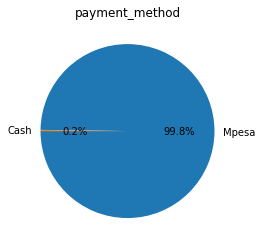

In [23]:
plt.title('payment_method')
g = plt.pie(df.payment_method.value_counts(), labels=df.payment_method.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [21]:
df.payment_method.value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

In [84]:
# ride_id_dict = {} 
# for ride_id in df["ride_id"]:
#     if not ride_id in ride_id_dict:
#         ride_id_dict[ride_id] = 1
#     else:
#         ride_id_dict[ride_id] += 1

        # or

label=da.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()

In [90]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [86]:
label

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


In [91]:
df=df.drop_duplicates("ride_id")

why we are deleting is that we had foung our target variable.So no need of delete duplicate of ride id

In [92]:
df = df.merge(label, how="left",on="ride_id")

In [93]:
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2B,Mpesa,FSAA2XB4WX,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49,11
6245,13813,14B,Mpesa,TSOPCEGOKH,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,11
6246,13825,24A,Mpesa,B3R9XWCV9O,20-04-18,7:09,Rongo,Nairobi,Bus,49,1
6247,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1


 let us merge two datasets on ride_id key to make the final dataset where we have dependent as well as independent variables too.

In [94]:
df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

Now we have found our final dataset so let us remove some features that doesn't seem to be important for predicting the number of tickets in our model

In [95]:
df.drop(["travel_to"],axis=1,inplace=True)

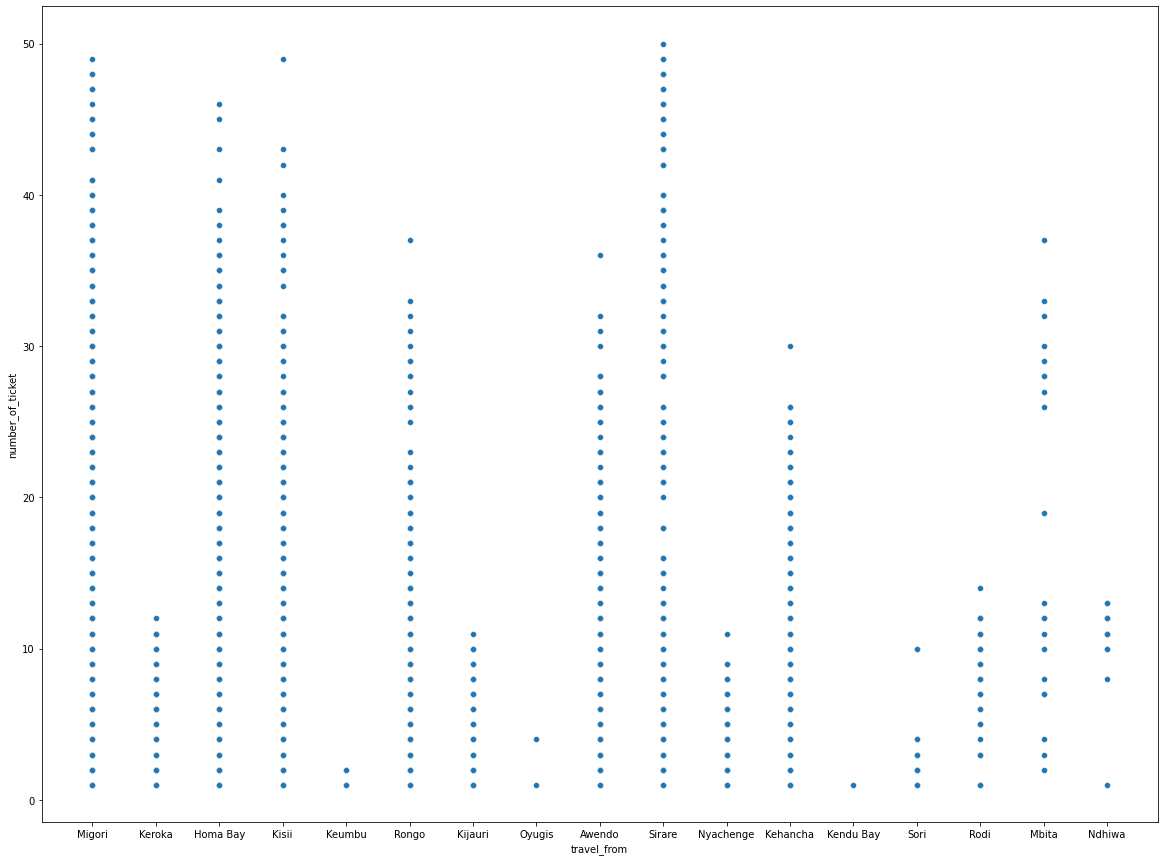

In [96]:
plt.figure(figsize=(20, 15))

sp = sns.scatterplot(x="travel_from", y="number_of_ticket", data=df)

In [97]:
df["date"]=df["travel_date"]+ " "+df["travel_time"]

In [99]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["day_of_year"]=df["date"].dt.dayofyear
  df["day_of_month"]=df["date"].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return df

In [100]:
df_new = time_features(df)

In [101]:
df_new

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,23:10,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,110,20,201816,23,10,0,2018,2,4
6245,13813,20-04-18,7:05,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,110,20,201816,7,5,0,2018,2,4
6246,13825,20-04-18,7:09,Rongo,Bus,49,1,2018-04-20 07:09:00,4,110,20,201816,7,9,0,2018,2,4
6247,13826,20-04-18,8:00,Awendo,Bus,49,1,2018-04-20 08:00:00,4,110,20,201816,8,0,0,2018,2,4


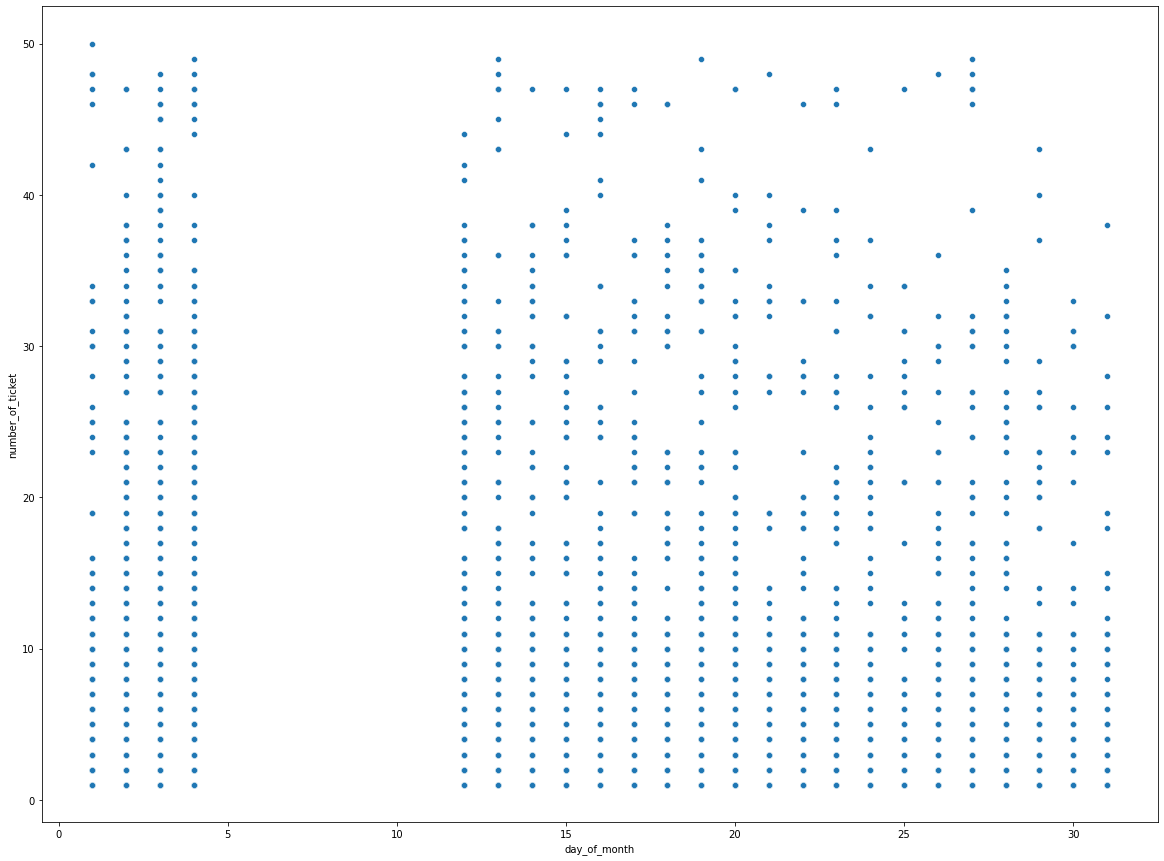

In [102]:
plt.figure(figsize=(20, 15))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=df)

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.

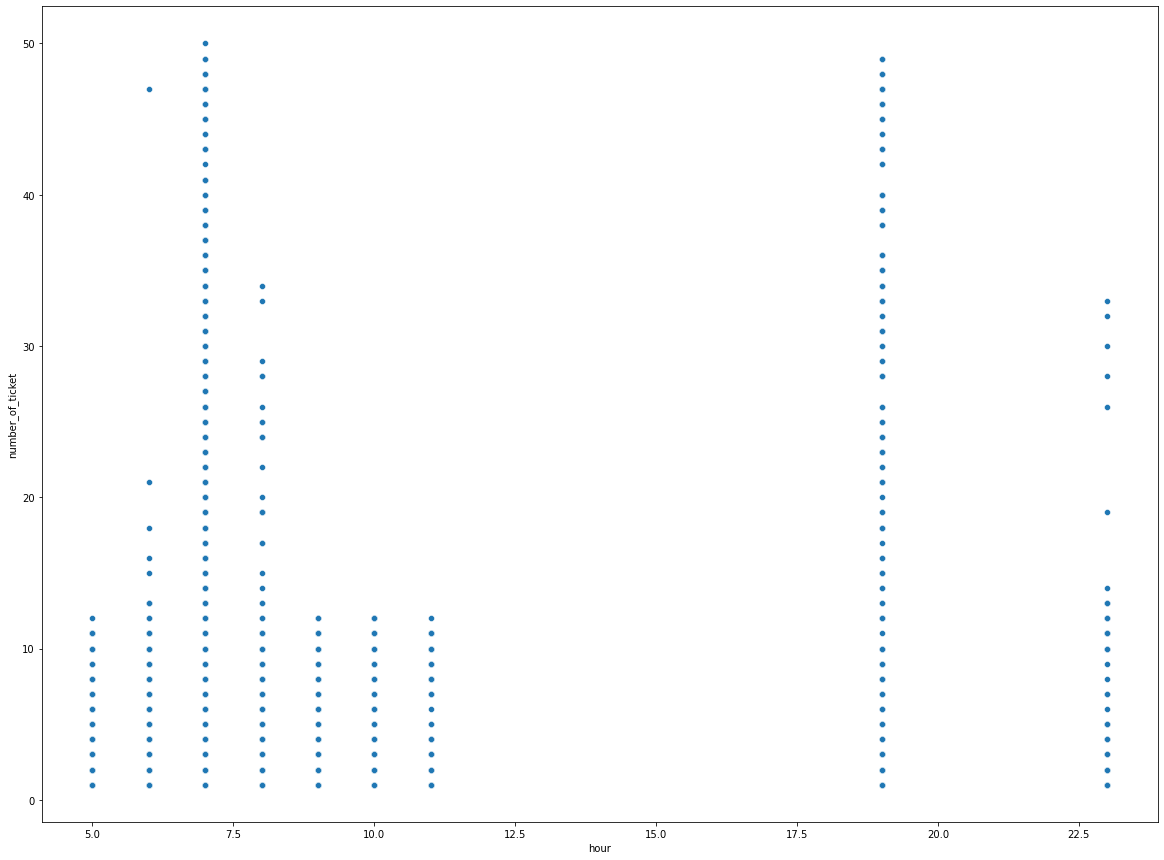

In [104]:
plt.figure(figsize=(20, 15))

sns.scatterplot(x='hour', y="number_of_ticket", data=df)

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is not ride between 12pm to 5.30Pm

In [105]:
df_new["travel_time"] = df_new["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [106]:
df_new['period'] = np.nan

df_new.loc[df_new.travel_time < 7, 'period'] = 'em'
df_new.loc[(df_new.travel_time >= 7) & (df_new.travel_time < 11), 'period'] = 'am'
df_new.loc[(df_new.travel_time >= 11) & (df_new.travel_time < 15), 'period'] = 'mid'
df_new.loc[(df_new.travel_time >= 15) & (df_new.travel_time < 19), 'period'] = 'eve'
df_new.loc[(df_new.travel_time >= 19) & (df_new.travel_time <= 24), 'period'] = 'pm'


pcount = dict(df_new['period'].value_counts())
pcount


df_new['hourly_travelers'] = np.log1p(df_new['period'].map(pcount))



dcount = dict(df_new["day_of_year"].value_counts())
df_new["daily_travelers"] = np.log1p(df_new["day_of_year"].map(dcount))
df_new.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201


In [107]:
df_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'period', 'hourly_travelers',
       'daily_travelers'],
      dtype='object')

In [108]:
new_cols = ['day_of_year','daily_travelers','minute','day_of_month','hourly_travelers','is_weekend','day_of_week']

In [109]:
trans_dataset=df_new.copy()

In [110]:
trans_dataset

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,10,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,11,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,11,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,11,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,11,am,8.494743,3.871201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,23.166667,Ndhiwa,Bus,49,11,2018-04-20 23:10:00,4,110,...,201816,23,10,0,2018,2,4,pm,5.659482,3.737670
6245,13813,20-04-18,7.083333,Ndhiwa,Bus,49,11,2018-04-20 07:05:00,4,110,...,201816,7,5,0,2018,2,4,am,8.494743,3.737670
6246,13825,20-04-18,7.150000,Rongo,Bus,49,1,2018-04-20 07:09:00,4,110,...,201816,7,9,0,2018,2,4,am,8.494743,3.737670
6247,13826,20-04-18,8.000000,Awendo,Bus,49,1,2018-04-20 08:00:00,4,110,...,201816,8,0,0,2018,2,4,am,8.494743,3.737670


In [111]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
trans_dataset['month'].replace(dict_cov,inplace=True)

In [112]:
trans_dataset.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1])

In [113]:
conv_dict = {17:2, 19:2, 26:3, 27:3, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2,  4:1, 28:2, 31:3, 30:3, 29:3, 25:3, 24:3,
       23:3, 22:3, 21:3, 12:1,  3:1,  2:1,  1:2}
trans_dataset['day_of_month'].replace(conv_dict,inplace=True)

In [114]:
trans_dataset.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,year_woy,hour,minute,is_weekend,year,quarter,month,period,hourly_travelers,daily_travelers
0,1442,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,...,201742,7,15,0,2017,4,3,am,8.494743,0.693147
1,5437,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,...,201746,7,12,1,2017,4,2,am,8.494743,0.693147
2,5710,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,...,201747,7,5,1,2017,4,2,am,8.494743,0.693147
3,5777,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,...,201748,7,10,0,2017,4,2,am,8.494743,3.871201
4,5778,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,...,201748,7,12,0,2017,4,2,am,8.494743,3.871201


In [117]:
def find_difference_bw_bus(data):
  
  data.sort_values(["travel_from","date"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date"]-data.groupby(["travel_from"]).date.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date.shift(-1)-data.groupby(["travel_from"]).date.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")
  return data

In [118]:
data = find_difference_bw_bus(trans_dataset)

In [119]:
data.dropna(inplace=True)

In [122]:
data.isnull().sum()

ride_id                           0
travel_date                       0
travel_time                       0
travel_from                       0
car_type                          0
max_capacity                      0
number_of_ticket                  0
date                              0
day_of_week                       0
day_of_year                       0
day_of_month                      0
year_woy                          0
hour                              0
minute                            0
is_weekend                        0
year                              0
quarter                           0
month                             0
period                            0
hourly_travelers                  0
daily_travelers                   0
Time_gap_btw_0_1_next_bus         0
Time_gap_btw_0_1_previous_bus     0
Time_gap_btw_0_2_next_bus         0
Time_gap_btw_0_2_previous_bus     0
Time_gap_btw_0_3_next_bus         0
Time_gap_btw_0_3_previous_bus     0
Time_gap_btw_next_previous_b

In [123]:
data

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,...,period,hourly_travelers,daily_travelers,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus,Time_gap_btw_0_2_next_bus,Time_gap_btw_0_2_previous_bus,Time_gap_btw_0_3_next_bus,Time_gap_btw_0_3_previous_bus,Time_gap_btw_next_previous_bus
502,6654,05-12-17,7.133333,Awendo,Bus,49,2,2017-05-12 07:08:00,4,132,...,am,8.494743,4.025352,-5688.000000,5688.000000,-5688.066667,5688.066667,-5688.083333,5688.083333,5688.066667
5530,12926,01-04-18,7.133333,Awendo,Bus,49,20,2018-01-04 07:08:00,3,4,...,am,8.494743,3.526361,-0.066667,5688.000000,-0.083333,5688.066667,-0.866667,5688.083333,5688.066667
5533,12929,01-04-18,7.200000,Awendo,Bus,49,2,2018-01-04 07:12:00,3,4,...,am,8.494743,3.526361,-0.016667,0.066667,-0.800000,5688.066667,-215.933333,5688.083333,0.083333
5539,12935,01-04-18,7.216667,Awendo,Bus,49,9,2018-01-04 07:13:00,3,4,...,am,8.494743,3.526361,-0.783333,0.016667,-215.916667,0.083333,-216.033333,5688.083333,0.800000
5528,12924,01-04-18,8.000000,Awendo,Bus,49,15,2018-01-04 08:00:00,3,4,...,am,8.494743,3.526361,-215.133333,0.783333,-215.250000,0.800000,-239.133333,0.866667,215.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,13299,10-04-18,7.083333,Sori,Bus,49,2,2018-10-04 07:05:00,3,277,...,am,8.494743,3.891820,-744.000000,720.000000,-760.083333,4015.916667,-1464.000000,4032.000000,1464.000000
5875,13351,11-04-18,7.083333,Sori,Bus,49,2,2018-11-04 07:05:00,6,308,...,am,8.494743,3.970292,-16.083333,744.000000,-720.000000,1464.000000,-736.083333,4759.916667,760.083333
5834,13309,11-04-18,23.166667,Sori,Bus,49,4,2018-11-04 23:10:00,6,308,...,pm,5.659482,3.970292,-703.916667,16.083333,-720.000000,760.083333,-736.083333,1480.083333,720.000000
5921,13408,12-04-18,7.083333,Sori,Bus,49,3,2018-12-04 07:05:00,1,338,...,am,8.494743,3.951244,-16.083333,703.916667,-720.000000,720.000000,-736.083333,1464.000000,720.000000


In [124]:
from datetime import datetime
from datetime import timedelta

In [126]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
data["travel_from_distance"]=data.travel_from.map(distance)
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
data["travel_from_time"]=data.travel_from.map(time)
data["Speed"]=data.travel_from_time/data.travel_from_distance

 finding the distance of each origin point from the distination point. I used Nirobi Map to estimate the distance from origin point to destination map.

In [127]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
for key in time.keys(): 
    time[key]=timedelta( minutes=time[key])

#find the date of traveling from origin 
data["Date_of_traveling_from_origin"]=data.travel_from.map(time)

# find the date of arrival at distination
data["arrival_date"]=data.date+ data.Date_of_traveling_from_origin
data["hod_arrived_date"]=data["arrival_date"].dt.hour
data["minute_arrived_date"]=data["arrival_date"].dt.minute
del data["Date_of_traveling_from_origin"],data["arrival_date"]
data["is_rush_hour"]=0
data.loc[data.hod_arrived_date.between(7,17),"is_rush_hour"]=1

In [128]:
from sklearn import preprocessing #Import LabelEncoder
data = pd.get_dummies(data, columns=['travel_from','day_of_month','month'])
label_enc = {'Bus':1,'shuttle':0}
data.replace(label_enc,inplace=True)

In [129]:
data.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
502,6654,05-12-17,7.133333,1,49,2,2017-05-12 07:08:00,4,132,201719,...,0,0,0,0,1,0,0,0,0,1
5530,12926,01-04-18,7.133333,1,49,20,2018-01-04 07:08:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5533,12929,01-04-18,7.200000,1,49,2,2018-01-04 07:12:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5539,12935,01-04-18,7.216667,1,49,9,2018-01-04 07:13:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0
5528,12924,01-04-18,8.000000,1,49,15,2018-01-04 08:00:00,3,4,20181,...,0,0,0,0,1,0,0,1,0,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 502 to 5884
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ride_id                         6246 non-null   int64         
 1   travel_date                     6246 non-null   object        
 2   travel_time                     6246 non-null   float64       
 3   car_type                        6246 non-null   int64         
 4   max_capacity                    6246 non-null   int64         
 5   number_of_ticket                6246 non-null   int64         
 6   date                            6246 non-null   datetime64[ns]
 7   day_of_week                     6246 non-null   int64         
 8   day_of_year                     6246 non-null   int64         
 9   year_woy                        6246 non-null   object        
 10  hour                            6246 non-null   int64         
 11  mi

In [131]:
keys= ["ride_id"]
Target_name="number_of_ticket"
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket',
               'period'
]

In [132]:
features = data.drop(not_used_cols,axis=1).columns

In [138]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [139]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [140]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Predicting 
  y_pred = model.predict(X_test)
  #Find R-squared value
  r2 = r2_score(y_test, y_pred)
  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test,y_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(r2)
print('Important features are: \n')
used_cols

Adjust_r2: 0.34765695420895815
Train score: 0.41530852557070086
Test score: 0.35462034431444234
0.35467983130536396
Important features are: 



['day_of_year',
 'car_type',
 'hour',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'travel_from_distance',
 'hod_arrived_date',
 'is_rush_hour',
 'travel_from_Homa Bay',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Ndhiwa',
 'travel_from_Nyachenge',
 'travel_from_Rodi',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'travel_from_Sori',
 'day_of_month_3',
 'month_1']

In [141]:
print_metrics(y_test, y_test_pred)

MSE is 48.43511958300652
RMSE is 6.959534437231166
RMSE is 0.35462034431444234
MAE is 4.747479632757994
MAPE is 165.6029814900086


In [143]:
from sklearn.ensemble import GradientBoostingRegressor

In [144]:
used_cols = ['day_of_year']
prev_adjR2 = -0.01177282976168792
for col in features:
  used_cols.append(col)
  dataset_pr = data[used_cols]
  X= dataset_pr.copy()
  y = data['number_of_ticket']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
  reg = GradientBoostingRegressor(random_state=0)
  reg.fit(X_train, y_train)
  # Predicting 
  y_pred = reg.predict(X_test)
  y_pred_train=reg.predict(X_train)
  

  # Find Adjusted R-squared value
  adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  if prev_adjR2<adj_r2:
    prev_adjR2 = adj_r2
 #Find R-squared value
    r2 = r2_score(y_test, y_pred)
    r2_for_train= r2_score(y_train,y_pred_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test,y_test)
  else:
    used_cols.pop()

print(f'Adjust_r2: {prev_adjR2}')
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
print(f'r2_Test score: {r2}')
print(f'r2_train score: {r2_for_train}')
print_metrics(y_test, y_pred)
print('Important features are: \n')
used_cols

Adjust_r2: 0.604672199182078
Train score: 0.6763311371872496
Test score: 0.6085084709027759
r2_Test score: 0.6085084709027759
r2_train score: 0.6763311371872496
MSE is 29.390451961425605
RMSE is 5.421296151422241
RMSE is 0.6083833398036512
MAE is 3.540034943596906
MAPE is 113.2971059848168
Important features are: 



['day_of_year',
 'car_type',
 'day_of_week',
 'hour',
 'minute',
 'hourly_travelers',
 'daily_travelers',
 'Time_gap_btw_0_1_next_bus',
 'Time_gap_btw_0_1_previous_bus',
 'Time_gap_btw_0_2_next_bus',
 'Time_gap_btw_0_2_previous_bus',
 'Time_gap_btw_0_3_previous_bus',
 'Time_gap_btw_next_previous_bus',
 'travel_from_distance',
 'minute_arrived_date',
 'travel_from_Awendo',
 'travel_from_Keroka',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Sirare']

In [145]:
import xgboost as xgb
# dataset_pr = data[]
X = data[used_cols].copy()
y = data['number_of_ticket'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

[08:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.8940859451809798
Test score: 0.6669848678172825


0.8940859451809798

In [146]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

In [148]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11]}

In [162]:
from sklearn.model_selection import GridSearchCV
X = data[features].copy()
y = data['number_of_ticket'].copy()

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[09:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:22:06] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [169]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.004}